# **Get Basic Sales Summary from a Tiny SQLite Database using Python**

**Step 1: Create/Load the Database**

This creates a small dataset (5 products) with quantity and price.

In [57]:
import sqlite3

# Connect to the database (creates it if it doesn't exist)
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

# Create the 'sales' table
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

In [58]:
# Insert sample data
cursor.executemany('''
INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)
''', [
    ('Laptop', 5, 800),
    ('Smartphone', 10, 500),
    ('Tablet', 7, 300),
    ('Headphones', 15, 50),
    ('Smartwatch', 8, 200)
])

conn.commit()
conn.close()

**Step 2 – Connect Python to SQLite**

In [59]:
import sqlite3

# Connect to the database
conn = sqlite3.connect('sales_data.db')

**Step 3 – Write and Run the SQL Query**

This query sums up quantity and revenue grouped by product.

In [60]:
query = '''
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
'''

**Step 4 – Load Data into Pandas**

In [45]:
# query = "SELECT * FROM sales;"
# df = pd.read_sql_query(query, conn)
# print(df)

In [62]:
import pandas as pd

# Load query results into a DataFrame
df = pd.read_sql_query(query, conn)

# Show the data
print(df)

      product  total_qty  revenue
0  Headphones        135   6750.0
1      Laptop         45  36000.0
2  Smartphone         90  45000.0
3  Smartwatch         72  14400.0
4      Tablet         63  18900.0


**Step 5 – Visualize with Matplotlib**

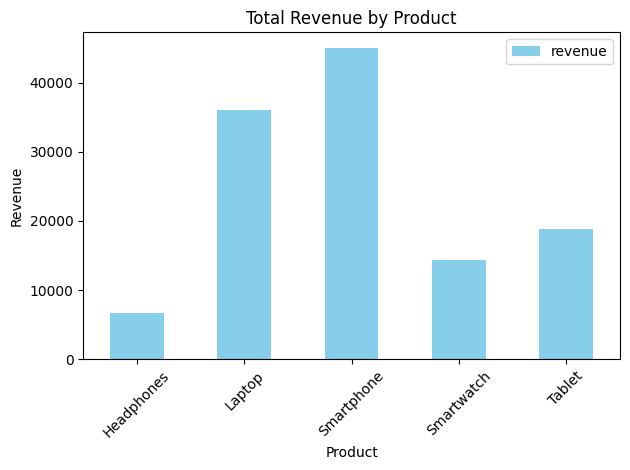

In [63]:
import matplotlib.pyplot as plt

# Plot a bar chart of revenue by product
df.plot(kind='bar', x='product', y='revenue', color='skyblue')

plt.title('Total Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()